In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.ensemble import RandomForestClassifier # For RFC
from sklearn.svm import SVC                               #For SVM
from sklearn.metrics import matthews_corrcoef    
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,auc
sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv("combined_dataset.csv")
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [3]:
inputs = df.drop(['label', 'domain'], axis=1)
outputs = df.label

In [4]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25)
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 71932 samples.
Testing set has 23978 samples.


In [8]:
#create RFC object
RFClass = RandomForestClassifier()

In [6]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=RFClass, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


f1 score is  0.9544009647323946
matthews correlation coefficient is  0.906357624647696
The accuracy Random forest classifier on testing data is:  95.44165485027942


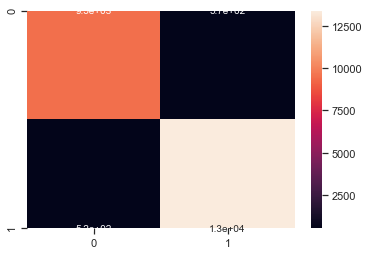

In [6]:

y_pred_rfc = rfc1..predict(x_test)

cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True)
print("f1 score is ",f1_score(y_test,y_pred_rfc,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred_rfc))
print("The accuracy Random forest classifier on testing data is: ",100.0 *accuracy_score(y_test,y_pred_rfc))

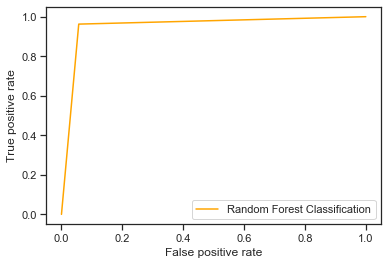

In [14]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_rfc)
roc_auc = accuracy_score(y_test,y_pred_rfc)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Random Forest Classification')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

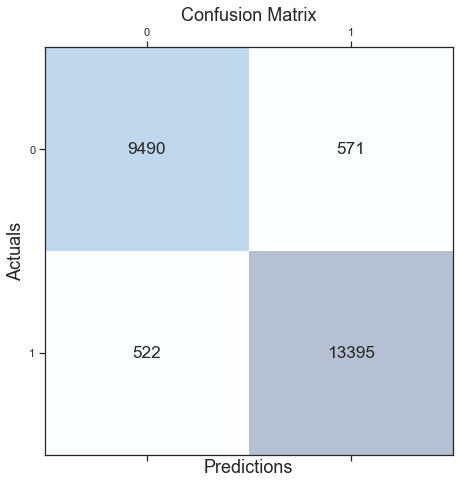

In [16]:
cm=confusion_matrix(y_test,y_pred_rfc)
# sns.heatmap(cm,annot=True)
# print(cm)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

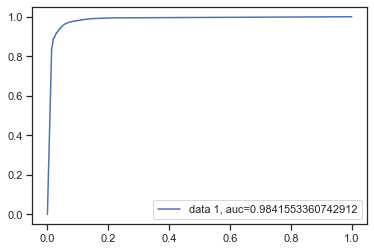

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_proba = RFClass.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

f1 score is  0.9544009647323946
matthews correlation coefficient is  0.7776756640936611
The accuracy Random forest classifier on testing data is:  89.21094336475102


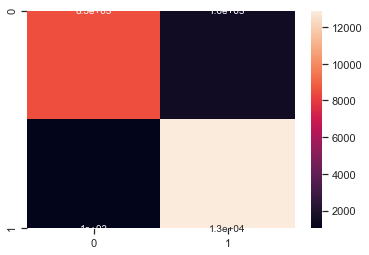

In [18]:
RFClass1 = RandomForestClassifier(max_depth=3, n_estimators=100)
#Train the model using training data 
RFClass1.fit(x_train,y_train)

#Test the model using testing data
y_pred_rfc1 = RFClass1.predict(x_test)

cm=confusion_matrix(y_test,y_pred_rfc1)
sns.heatmap(cm,annot=True)
print("f1 score is ",f1_score(y_test,y_pred_rfc,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred_rfc1))
print("The accuracy Random forest classifier on testing data is: ",100.0 *accuracy_score(y_test,y_pred_rfc1))

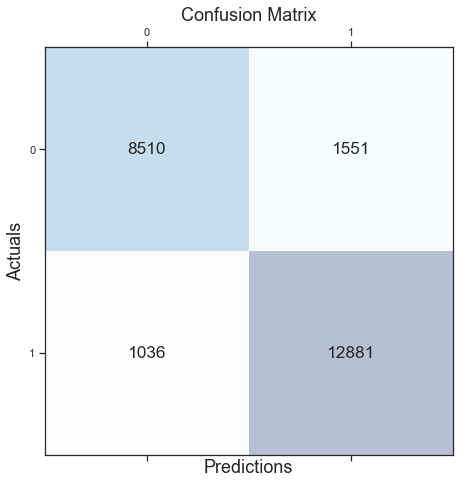

In [19]:
# sns.heatmap(cm,annot=True)
# print(cm)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

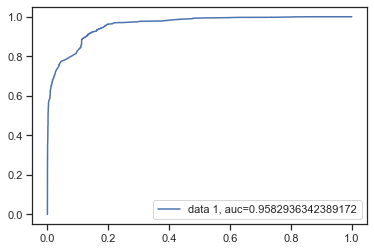

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_proba = RFClass1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10061
           1       0.96      0.96      0.96     13917

    accuracy                           0.95     23978
   macro avg       0.95      0.95      0.95     23978
weighted avg       0.95      0.95      0.95     23978



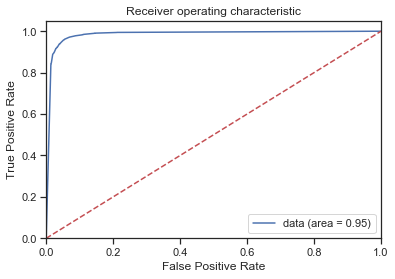

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, RFClass.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, RFClass.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='data (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()